## This notebook was created to help with connection info when making network models
### Given a volume of cells researchers report cell connections in a few different methods this notebook was made to help find the correct number of connections a cell should get

### First we need to figure out the cell density of a 300um sphere in our network. We do this because it is known the a cell can normally only connect to another cell a max distance of 300um

In [61]:
import numpy as np

volume_of_sphere = ((4/3)*(np.pi)*(300**3)) # eq for volume of a sphere
total_cell_number = 72000 # from biology
total_network_size = 1400**3 # from biology

cell_count_in_sphere = int((72000/(1400**3))*volume_of_sphere)
print("Total cell count in 300um sphere is",cell_count_in_sphere)

# cell amounts based off biology data
PN_A = int(cell_count_in_sphere * 0.569)
PN_C = int(cell_count_in_sphere * 0.231)
PV = int(cell_count_in_sphere * 0.1)
SOM = int(cell_count_in_sphere * 0.1)

Total cell count in 300um sphere is 2967


### Next we will compute a Gaussian function which we will late optimize. A Guassian function has a P_max and sigma value which together make a bell curve. For more information about this check out the BMTK paper https://www.biorxiv.org/content/10.1101/2021.03.31.437553v2.full

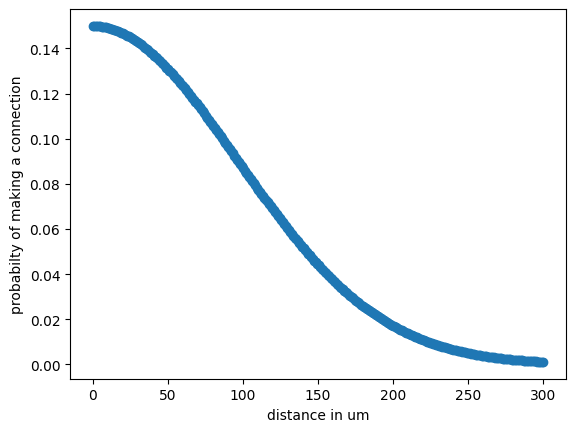

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

#plots a graph of the gaus
distance = np.linspace(0,300,300) # unit is um 
    
def gaus_connection(distance, p_max=0.15, sigma=95.98): # p_max, and sigma are examples from bmtk paper will need to change
    top = (distance) ** 2                            
    bottom = 2 * (sigma ** 2)
    prob = p_max * np.exp(-1*(top/bottom))
    return prob

prob = []
for i in range(len(distance)):
    p = gaus_connection(distance[i])
    prob.append(p)

plt.xlabel("distance in um")
plt.ylabel("probabilty of making a connection")
plt.scatter(distance,prob)
plt.show()

### Next to figure out how many connections we expect we will take the intergal of this function from 0,300.If you are messing with the code to fine number of connections for your model all of this block of code can stay the same. You can either chance the P_max and sigma above and then rerun code or play with the function below this block block

In [57]:
import scipy.integrate as intergrate

# Total # of cells of type B connecting to a cell of Type A
# at the middle of the sphere = Integ prob of connection of A to B x 4* pi* r2 dr) from 0 to 300 um.
def integrand(x,cell_type_density_in_sphere):
    p = gaus_connection(x)
    surface_area = (4 * np.pi * (x**2))
    V = ((4/3)*(np.pi)*(300**3)) 
    I = p * (surface_area * (cell_type_density_in_sphere/(V)))
    return I

cell_type_density_in_sphere = PV # means looking at FSI-cell connection
num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
print("The total number of connections made with a cell density of %d in a 300 um sphere to a single cell in the middle "
      "of the sphere is %d" %(cell_type_density_in_sphere, num))

The total number of connections made with a cell density of 296 in a 300 um sphere to a single cell in the middle of the sphere is 5


### Now lets say you have data that is given in percent connectivity. You need to find a gaussian function that gives you a the same change of connectivity as that precent given. To do this you find the intergal of the precent connectivity and then find a gaussian function with the same area under the curve as the precent connectivity. Below is an example of this. I think you could also do something called a Laplace Approximation but i did not do that here.

In [71]:
def gaus_connection(distance, p_max=0.85, sigma=95.98):
    top = (distance) ** 2                            
    bottom = 2 * (sigma ** 2)
    prob = p_max * np.exp(-1*(top/bottom))
    return prob

def integrand(x,cell_type_density_in_sphere):
    p = gaus_connection(x)
    surface_area = (4 * np.pi * (x**2))
    V = ((4/3)*(np.pi)*(300**3)) 
    I = p * (surface_area * (cell_type_density_in_sphere/(V)))
    return I

def integrand2(x):
    p = gaus_connection(x)
    output = p/300
    return output

cell_type_density_in_sphere = PV # means looking at FSI-cell connection
num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
num2, error = intergrate.quad(integrand2, 0, 300)

print("This Gaussian function mimics percent connecitivy of %.2f" %(num2))
print("With that new Gaussian function you would expect to have %d connections"%(num))

This Gaussian function mimics percent connecitivy of 0.34
With that new Gaussian function you would expect to have 30 connections


### Run this to plot to see what that new Gaussian function looks like

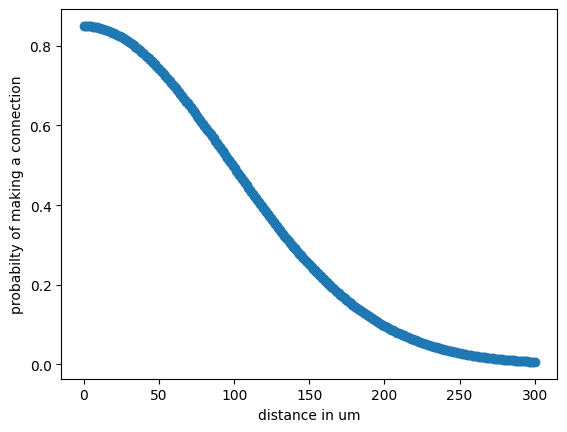

In [72]:
prob = []
for i in range(len(distance)):
    p = gaus_connection(distance[i])
    prob.append(p)

plt.xlabel("distance in um")
plt.ylabel("probabilty of making a connection")
plt.scatter(distance,prob)
plt.show()